In [85]:
#ucitavanje biblioteka
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import decomposition
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
from sklearn.metrics import silhouette_score

In [52]:
#ucitavanje dataset-a
df = pd.read_csv('DataMining/Bike Sharing.csv')

In [53]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,NaN,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600


In [54]:
#tipovi podataka
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual        float64
registered    float64
cnt             int64
dtype: object

In [55]:
#deskriptivna statistika
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,729.000000,728.000000,730.000000,728.000000,729.000000,730.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.494953,0.474203,0.627809,0.190449,848.791495,3654.549315,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.182968,0.162960,0.142508,0.077456,687.415068,1560.708499,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336667,0.337891,0.520000,0.134950,315.000000,2495.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.485158,0.626250,0.180975,713.000000,3660.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655000,0.608289,0.730313,0.233211,1097.000000,4759.750000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [56]:
#provera null vrednosti
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          2
atemp         3
hum           1
windspeed     3
casual        2
registered    1
cnt           0
dtype: int64

In [57]:
#broj redova i kolona
df.shape

(731, 16)

In [58]:
#izbacivanje redova u kojima bar jedna kolona ima null vrednost
df = df.dropna(how='any')

In [59]:
#broj redova i kolona nakon izbacivanja null vrednosti
df.shape

(719, 16)

In [60]:
#nazivi kolona
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [61]:
#uzimanje u obzir samo numerickih podataka (izbacivanje datuma)
df_numeric = df.select_dtypes(include = ['int64', 'float64'])

In [62]:
#izbacivanje kolone koja je id
df_numeric = df_numeric.drop(df.columns[0], axis=1)

In [63]:
#normalizacija podataka
scaler = MinMaxScaler()
scaler.fit(df_numeric)
df_normalized = scaler.transform(df_numeric)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [65]:
#kastovanje dobijenih normalizovanih podataka u dataframe
df_normalized = pd.DataFrame(df_normalized)
df_normalized.columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt']

In [67]:
#normalizovani dataframe
df_normalized.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.0,0.0,0.0,0.0,1.000000,0.0,0.5,0.355170,0.373517,0.828620,0.284606,0.096538,0.091539,0.110792
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.379232,0.360541,0.715771,0.466215,0.037852,0.093849,0.089623
2,0.0,0.0,0.0,0.0,0.166667,1.0,0.0,0.171000,0.144830,0.449638,0.465740,0.034624,0.174560,0.152669
3,0.0,0.0,0.0,0.0,0.500000,1.0,0.0,0.209120,0.197158,0.449313,0.339143,0.023474,0.216286,0.181546
4,0.0,0.0,0.0,0.0,0.666667,1.0,0.0,0.180948,0.202329,0.532916,0.138482,0.025235,0.216286,0.182237


In [68]:
#deskriptivna statistika normalizovanih podataka
df_normalized.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,0.498841,0.500695,0.502086,0.029207,0.499073,0.682893,0.195410,0.543935,0.519079,0.644195,0.346362,0.248585,0.525740,0.516389
std,0.370229,0.500348,0.313515,0.168504,0.334259,0.465673,0.271165,0.228397,0.214190,0.145946,0.160441,0.201115,0.225935,0.223257
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.272727,0.000000,0.166667,0.000000,0.000000,0.346343,0.339674,0.533848,0.230786,0.091989,0.357638,0.360101
50%,0.666667,1.000000,0.545455,0.000000,0.500000,1.000000,0.000000,0.549345,0.536771,0.643102,0.326928,0.211561,0.526567,0.521284
75%,0.666667,1.000000,0.818182,0.000000,0.833333,1.000000,0.500000,0.743521,0.696732,0.750214,0.434622,0.321743,0.689503,0.685573
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
#podela dataset-a na train i test
train, test = train_test_split(df_normalized, test_size=0.3)

In [72]:
#analiza glavnih komponenti
pca = decomposition.PCA()
pca.fit(train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [73]:
print(pca.explained_variance_)

[3.22754922e-01 2.44574450e-01 2.32153468e-01 1.13282264e-01
 1.09928686e-01 7.22139275e-02 2.82349670e-02 2.53112902e-02
 1.94433838e-02 1.48296796e-02 8.56790614e-03 7.32366595e-03
 4.90079103e-04 7.53374504e-33]


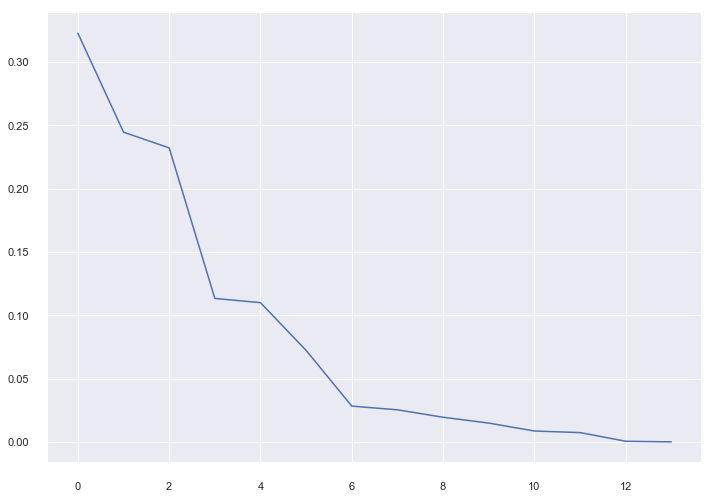

In [76]:
plt.plot(pca.explained_variance_, scalex=True)
sns.despine(offset=10, trim=True)

In [77]:
pca.n_components = 6
pca.components_[0:6, :]

array([[-0.26971571, -0.73283905, -0.18921481,  0.01326866, -0.01725322,
        -0.04359645,  0.07526798, -0.18780866, -0.17533536,  0.0109276 ,
         0.05672532, -0.17954249, -0.35021603, -0.34945663],
       [ 0.2812056 , -0.2183438 ,  0.21406268,  0.08831844, -0.04003983,
        -0.8440115 , -0.04199233,  0.11513904,  0.11132431,  0.02650135,
        -0.04523529,  0.26097009, -0.07455826,  0.04291251],
       [-0.55060441,  0.48006453, -0.42937196,  0.05154034, -0.00528507,
        -0.43610172, -0.03661275, -0.17117046, -0.16435426, -0.08546517,
         0.09156778,  0.06388432, -0.09548153, -0.05103398],
       [ 0.13144498,  0.11302652,  0.1678642 , -0.04358593,  0.87628585,
        -0.0771405 ,  0.25220834, -0.20579487, -0.19750881,  0.04799531,
         0.03071598, -0.07498653, -0.07016601, -0.08531108],
       [ 0.24606954,  0.29013539,  0.31773246,  0.07634523, -0.46631309,
        -0.05826719,  0.38407856, -0.35547053, -0.33009122,  0.14047909,
         0.00650941, -0.23

In [79]:
train_pca=pca.fit_transform(train)

In [80]:
test_pca=pca.fit_transform(test)

In [82]:
train_pca_frame=pd.DataFrame(train_pca, columns= range(1,7), index = train.index)
test_pca_frame=pd.DataFrame(test_pca, columns= range(1,7), index = test.index)


In [83]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(train)
    cluste_labels = kmeans.labels_
    sse[k] = kmeans.inertia_ 

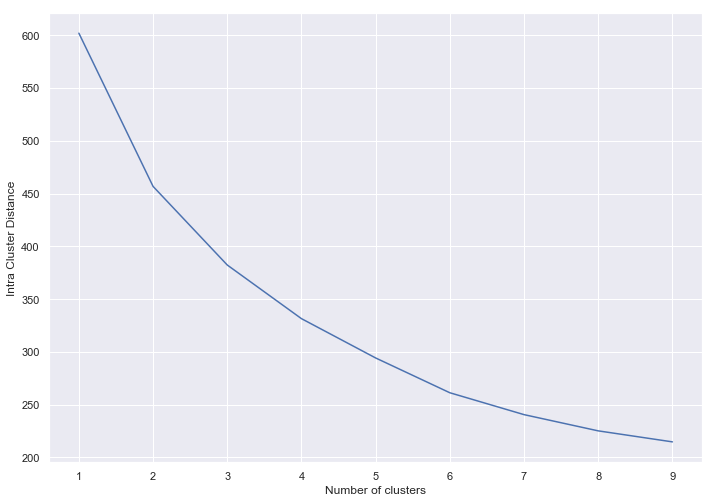

In [84]:
plt.close()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Intra Cluster Distance")
plt.show()

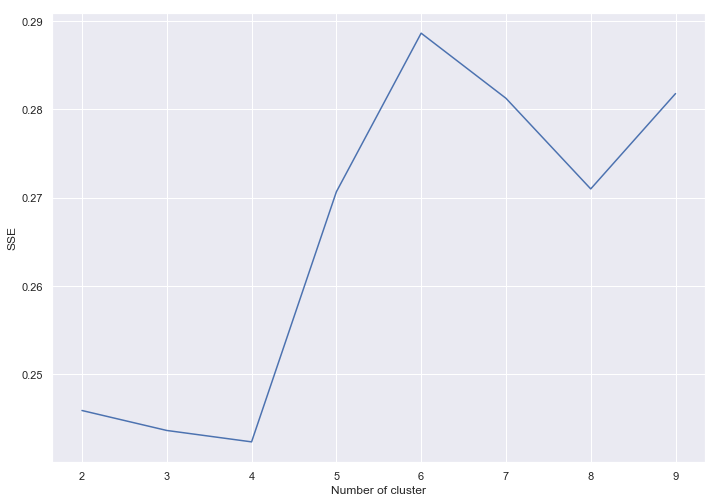

In [88]:
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(train)
    cluster_labels = kmeans.fit_predict(train)
    sse[k] = silhouette_score(train, cluster_labels)

plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [89]:
kmeans_algorithm = KMeans(n_clusters = 6, max_iter = 100) #define algorithm

cluster_model_normalized = kmeans_algorithm.fit(train) #create model

clusters_normalized = cluster_model_normalized.predict(train) #predict clusters


In [90]:
train['Cluster'] = clusters_normalized

C:\Users\Marija.Miljkovic\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [91]:
train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Cluster
251,0.666667,0.0,0.727273,0.0,0.333333,1.0,0.0,0.737290,0.688457,0.732648,0.246175,0.205106,0.583598,0.545444,1
652,1.000000,1.0,0.818182,0.0,0.666667,1.0,0.5,0.611648,0.591497,0.823051,0.210244,0.256162,0.933295,0.844110,2
245,0.666667,0.0,0.727273,0.0,0.500000,1.0,1.0,0.672912,0.610585,0.943016,0.153852,0.034038,0.268265,0.227105,1
134,0.333333,0.0,0.363636,0.0,0.500000,1.0,0.5,0.611648,0.588177,0.894602,0.369225,0.156690,0.476321,0.440980,1
232,0.666667,0.0,0.636364,0.0,0.666667,1.0,0.5,0.778826,0.743981,0.793488,0.388482,0.127054,0.445712,0.404970,1


In [98]:
train[train['Cluster']==0].describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Cluster
count,65.000000,65.0,65.000000,65.000000,65.000000,65.0,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.0
mean,0.615385,1.0,0.572028,0.092308,0.505128,0.0,0.176923,0.646984,0.618381,0.641533,0.316351,0.605191,0.608865,0.722445,0.0
std,0.271510,0.0,0.235490,0.291712,0.487668,0.0,0.256643,0.181435,0.162253,0.139849,0.124999,0.216867,0.123697,0.156481,0.0
min,0.000000,1.0,0.181818,0.000000,0.000000,0.0,0.000000,0.232641,0.234323,0.261354,0.062834,0.090082,0.209356,0.276346,0.0
25%,0.333333,1.0,0.363636,0.000000,0.000000,0.0,0.000000,0.515079,0.505273,0.545416,0.229511,0.424296,0.538117,0.633801,0.0
50%,0.666667,1.0,0.545455,0.000000,0.500000,0.0,0.000000,0.682257,0.651150,0.620394,0.301270,0.654930,0.623737,0.730327,0.0
75%,0.666667,1.0,0.727273,0.000000,1.000000,0.0,0.500000,0.789210,0.739836,0.738218,0.417954,0.766138,0.691164,0.841118,0.0
max,1.000000,1.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.952767,0.937018,0.552557,0.962735,0.858504,1.000000,0.0


In [92]:
centers_normalized = cluster_model_normalized.cluster_centers_
centers_normalized

array([[6.15384615e-01, 1.00000000e+00, 5.72027972e-01, 9.23076923e-02,
        5.05128205e-01, 7.77156117e-16, 1.76923077e-01, 6.46984267e-01,
        6.18380614e-01, 6.41533241e-01, 3.16351476e-01, 6.05191405e-01,
        6.08865146e-01, 7.22445042e-01],
       [6.72413793e-01, 4.44089210e-16, 6.41849530e-01, 2.77555756e-17,
        5.14367816e-01, 1.00000000e+00, 2.02586207e-01, 6.48858640e-01,
        6.20276680e-01, 6.74067388e-01, 3.16953348e-01, 1.76921442e-01,
        5.07878857e-01, 4.74058587e-01],
       [6.88705234e-01, 1.00000000e+00, 6.28850488e-01, 2.77555756e-17,
        5.19283747e-01, 1.00000000e+00, 1.65289256e-01, 6.56253189e-01,
        6.20416191e-01, 6.44894007e-01, 2.94849063e-01, 2.69640224e-01,
        8.09389938e-01, 7.50663667e-01],
       [7.24637681e-02, 3.33066907e-16, 1.50197628e-01, 2.89855072e-02,
        5.31400966e-01, 6.95652174e-01, 2.39130435e-01, 2.82542608e-01,
        2.70734835e-01, 6.17541433e-01, 4.16715269e-01, 7.89829557e-02,
        2.115